# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import datetime

# Fetch TCS Stock Data

In [2]:

data = pd.read_csv('TCS_stock_history.csv') 
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)
data.head()



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [3]:
data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0
4462,2021-09-30,3805.000000,3805.000000,3765.000000,3773.199951,640479,0.0,0.0


In [4]:
 print(data.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [5]:

 data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
 data['High'] = pd.to_numeric(data['High'], errors='coerce')
 data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
 data['Close'] = pd.to_numeric(data['Close'], errors='coerce')


In [6]:

 data.fillna(method='ffill', inplace=True)


C:\Users\ARJAV JAIN\AppData\Local\Temp\ipykernel_11892\2124611322.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


# Visualize TCS Close Price

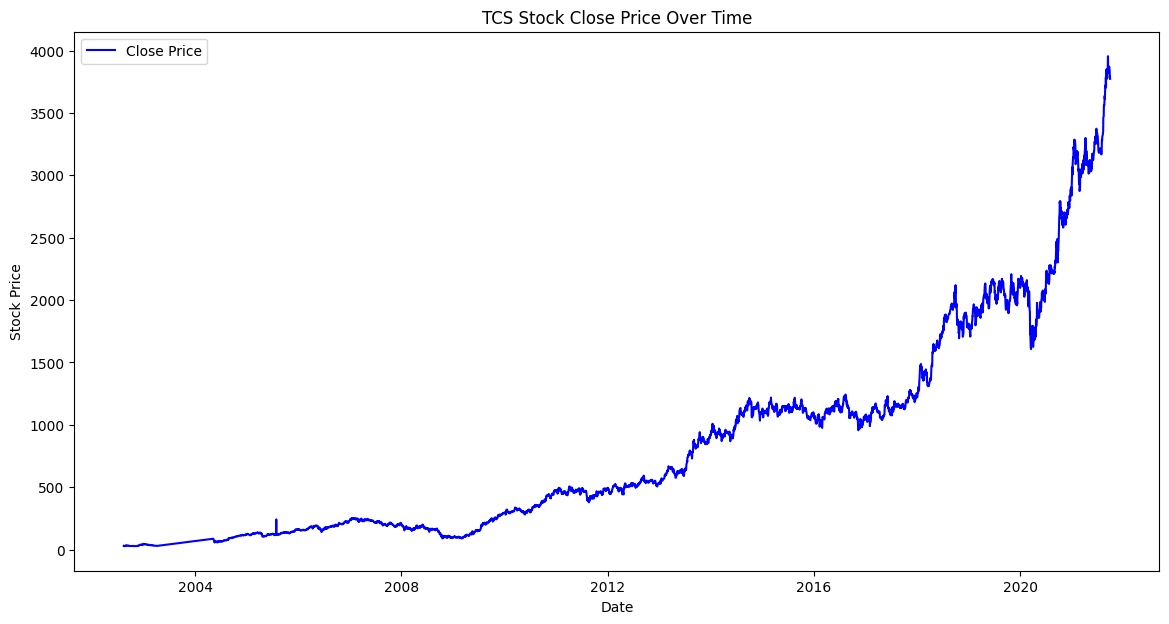

In [7]:

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], color='blue',label='Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Close Price Over Time')
plt.legend()
plt.show()

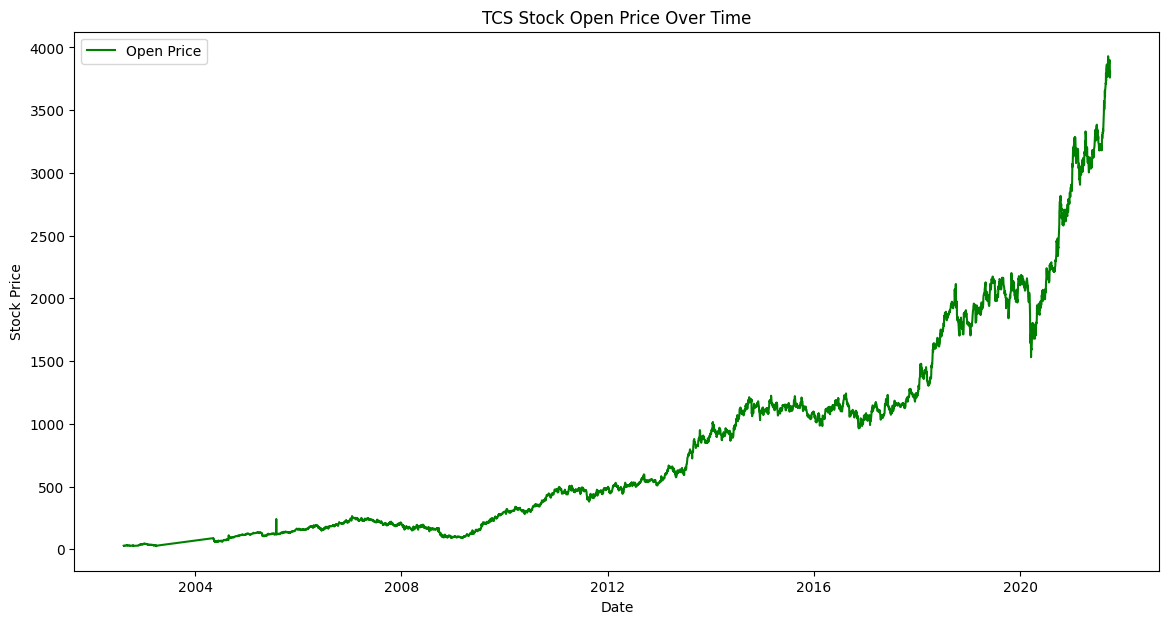

In [8]:

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Open'], color='g',label='Open Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Open Price Over Time')
plt.legend()
plt.show()


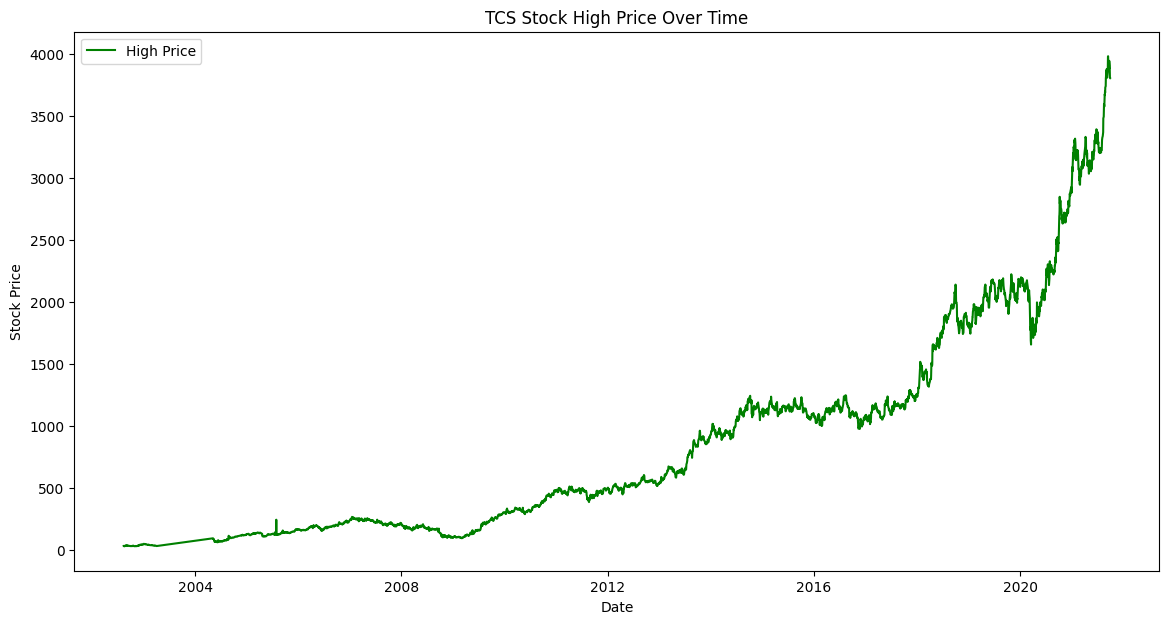

In [9]:

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['High'], color='g',label='High Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock High Price Over Time')
plt.legend()
plt.show()


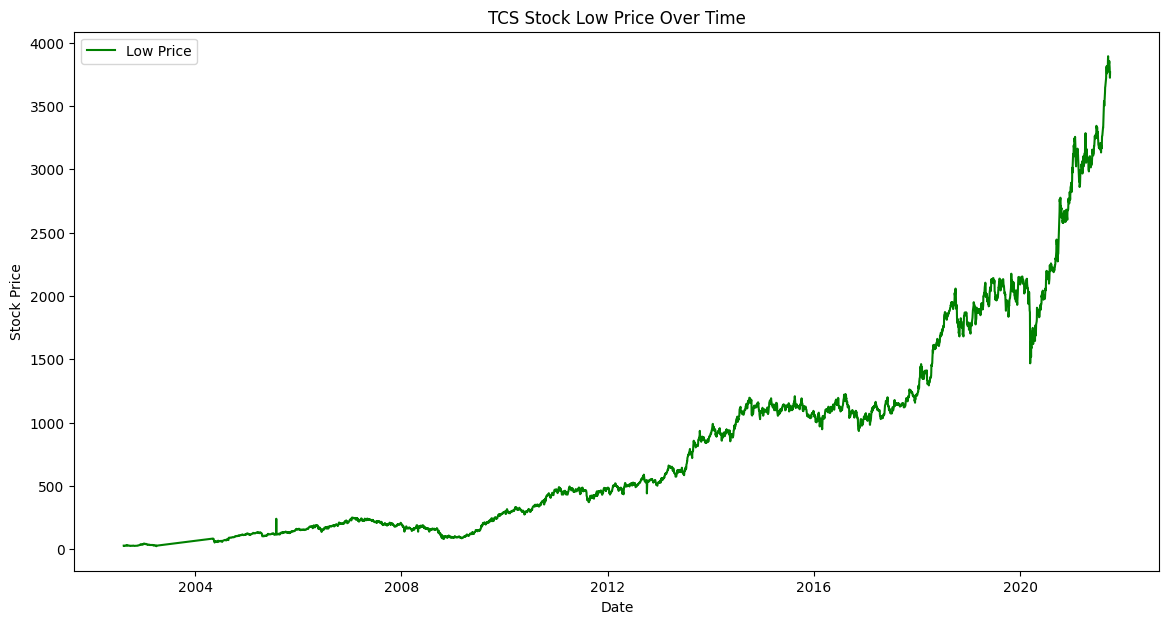

In [10]:

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Low'], color='g',label='Low Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Low Price Over Time')
plt.legend()
plt.show()


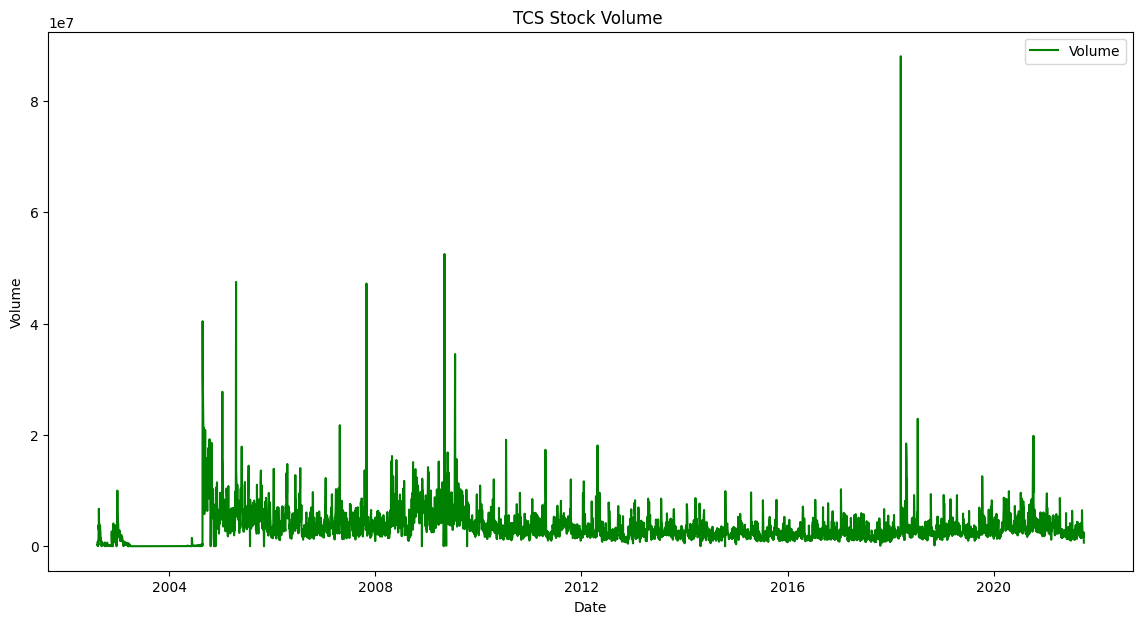

In [11]:

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Volume'], color='g',label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('TCS Stock Volume ')
plt.legend()
plt.show()

In [12]:

data['MAC50'] = data['Close'].rolling(window=50).mean()
data['MAC200'] = data['Close'].rolling(window=200).mean()

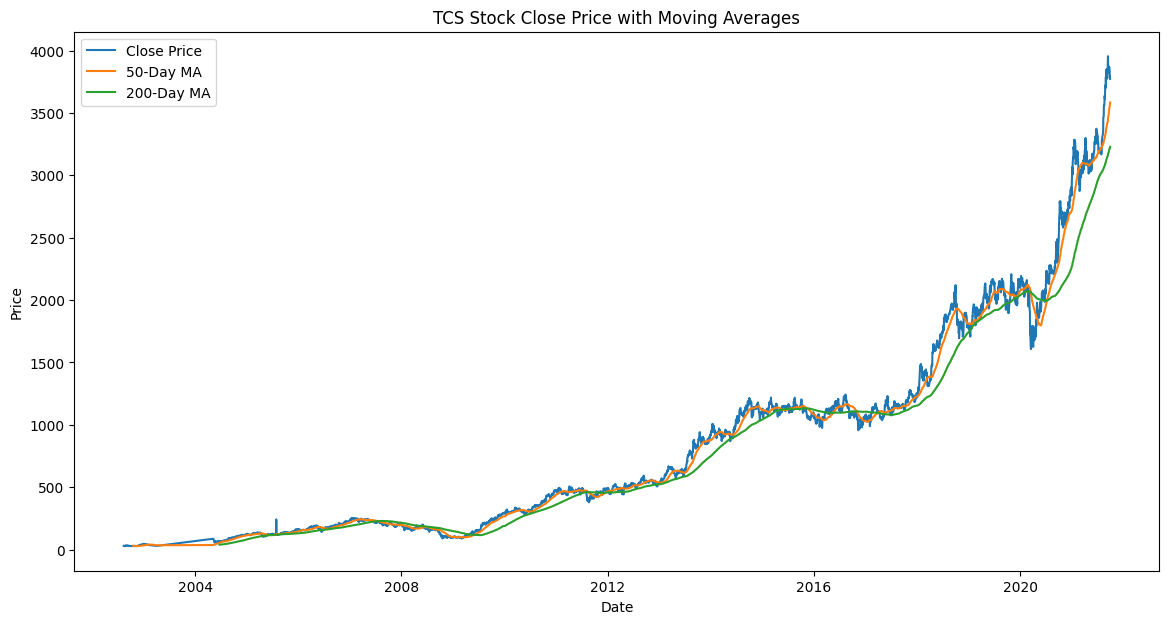

In [13]:

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MAC50'], label='50-Day MA')
plt.plot(data['Date'], data['MAC200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS Stock Close Price with Moving Averages')
plt.legend()
plt.show()

In [14]:

data['mao50']=data['Open'].rolling(window=50).mean()
data['mao200']=data['Open'].rolling(window=200).mean()


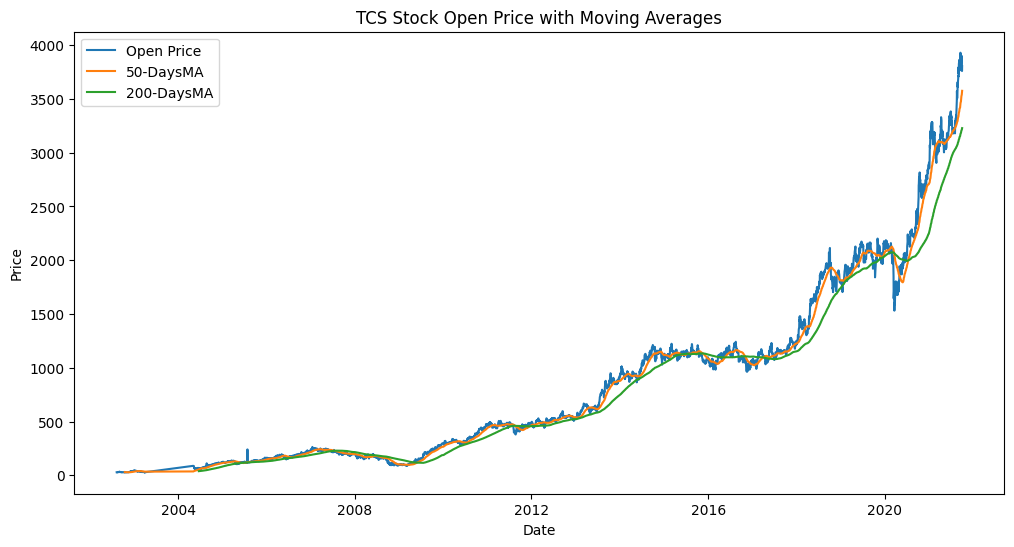

In [15]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'],data['Open'],label='Open Price')
plt.plot(data['Date'],data['mao50'],label='50-DaysMA')
plt.plot(data['Date'],data['mao200'],label='200-DaysMA')
plt.title('TCS Stock Open Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [16]:

data['mah50']=data['High'].rolling(window=50).mean()
data['mah200']=data['High'].rolling(window=200).mean()


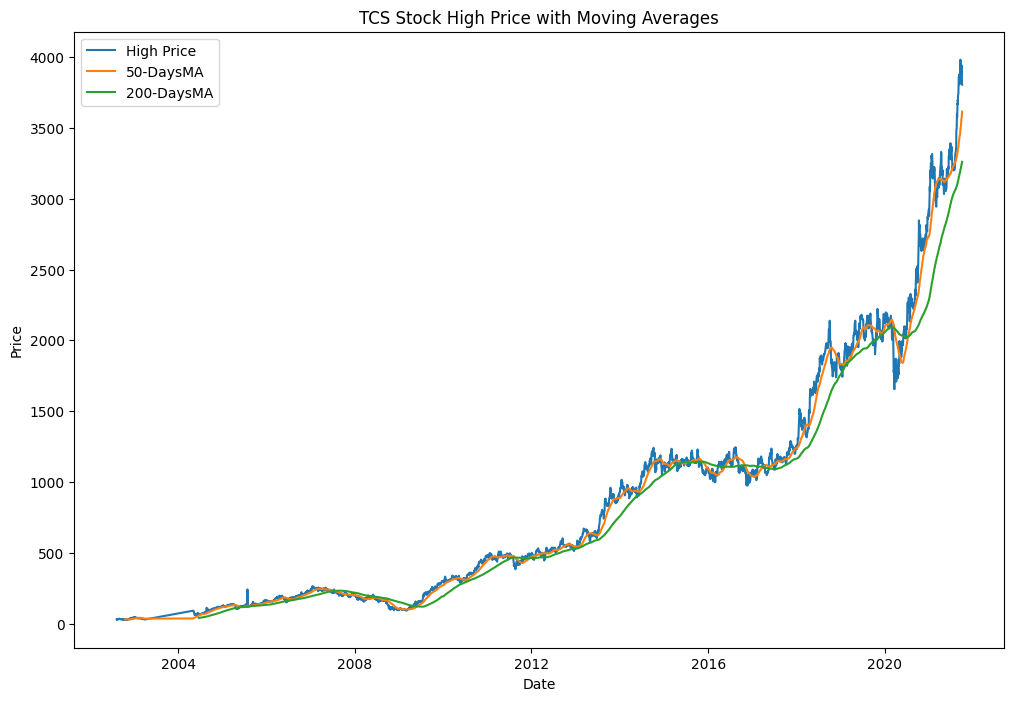

In [17]:
plt.figure(figsize=(12,8))
plt.plot(data['Date'],data['High'],label='High Price')
plt.plot(data['Date'],data['mah50'],label='50-DaysMA')
plt.plot(data['Date'],data['mah200'],label='200-DaysMA')
plt.title('TCS Stock High Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [18]:

data['mal50']=data['Low'].rolling(window=50).mean()
data['mal200']=data['Low'].rolling(window=200).mean()

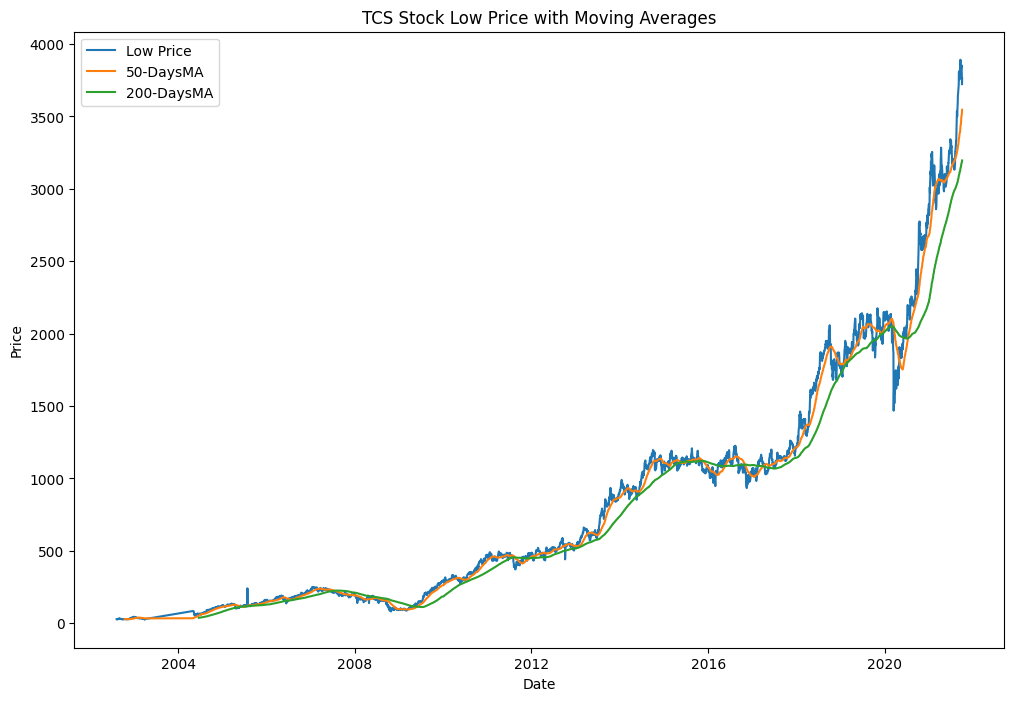

In [19]:

plt.figure(figsize=(12,8))
plt.plot(data['Date'],data['Low'],label='Low Price')
plt.plot(data['Date'],data['mal50'],label='50-DaysMA')
plt.plot(data['Date'],data['mal200'],label='200-DaysMA')
plt.title('TCS Stock Low Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Prepare Data for Linear Regression

In [20]:


data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.dayofweek



In [21]:

data['Prev_Close'] = data['Close'].shift(1)
data.dropna(inplace=True) # Drop rows with NaN values fromshifting

# Initialize and Train Linear Regression Model1

In [22]:

x = data[['Open', 'High', 'Low', 'Volume', 'Prev_Close', 'Day_of_Week', 'Month']]
y = data['Close']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [23]:

model.score(x_train,y_train) # accuracy of the model

0.9999144302750836

In [24]:
print("Mean Squared Error:", mean_squared_error(y_test,y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))


Mean Squared Error: 39.049929985802855
R-Squared Score: 0.9999438356582184


In [25]:

# test the data inside the df

test_date = '2021-09-30'
test_row = data[data['Date'] == test_date]
x_test = test_row[['Open', 'High', 'Low', 'Volume', 'Prev_Close', 'Day_of_Week', 'Month']]
# model.predict(x_test)
predicted_close = model.predict(x_test)
print(f"Predicted Close on {test_date}: {predicted_close[0]}")      # 3773.199951


Predicted Close on 2021-09-30: 3772.6746711093397


In [26]:

# teSt the data outside value its just for analysing

from datetime import datetime

test_date_str = '2025-05-03'
test_date = datetime.strptime(test_date_str, "%Y-%m-%d")

new_data = {
    'Open': 150.0,
    'High': 155.0,
    'Low': 149.0,
    'Volume': 600000,
    'Prev_Close': 148.50,
    'Day_of_Week': test_date.weekday(),  # Monday=0, Sunday=6
    'Month': test_date.month
}
x_new = pd.DataFrame([new_data])
predicted_close = model.predict(x_new)
print(f"Predicted Close: {predicted_close[0]}")



Predicted Close: 154.00992991223947


# Visualize Actual vs. Predicted Close Prices

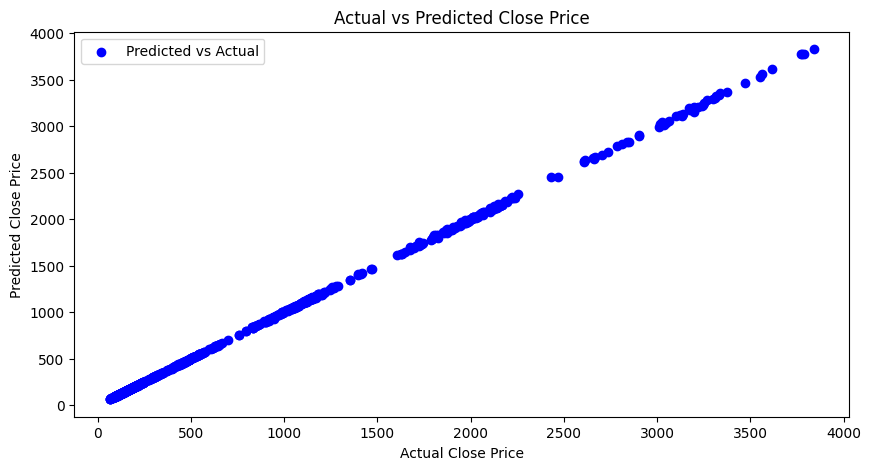

In [27]:

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()
